ANALISA DATA CHURN FACTOR pada dataset e-commerce dengan pendekatan klasifikasi model Machine Learning

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print("currect dir - {}".format(os.getcwd()))
print('\n')
for index, value in enumerate(os.listdir()):
    print("File name ke {} nama - {}".format(index+1, value))

currect dir - c:\Users\HP\Latihan\e_commerce_churnAnalysis


File name ke 1 nama - churn_e-commerceAnalysis.ipynb
File name ke 2 nama - E Commerce Dataset.xlsx


In [3]:
df=pd.read_excel(r'C:\Users\HP\Latihan\e_commerce_churnAnalysis\E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Imputation

In [5]:
null_percentage=["{:.3f}%".format(i/len(df)*100) for i in df.isnull().sum() if i>0]
null_value=[i for i in df.isnull().sum() if i>0]
indexing=[df.isnull().sum().index[indexing_null] for indexing_null,value in enumerate(df.isnull().sum()) if value>0]
dtype_null=[df[i].dtypes for i in indexing]

for i in range(len(indexing)):
    print('Kolom {} : Miss value {} : Null percentage {}'.format(indexing[i], null_value[i], null_percentage[i]))
    
dictio={"Null Value":null_value,
        "Null Value Percentage (%)":null_percentage,
        'Type data' : dtype_null}

pd.DataFrame(data=dictio,
             index=indexing).sort_values('Type data', ascending=True)

# KALAU DILIHAT DARI MISSING VALUE NYA, Tidak ada yang melebihi 10% dari keseluruhan range data set, sehingga tidak perlu drop null value
# All Missing value berkutat pada data numerik, tidak ada kolom data kategorikal yang lost

Kolom Tenure : Miss value 264 : Null percentage 4.689%
Kolom WarehouseToHome : Miss value 251 : Null percentage 4.458%
Kolom HourSpendOnApp : Miss value 255 : Null percentage 4.529%
Kolom OrderAmountHikeFromlastYear : Miss value 265 : Null percentage 4.707%
Kolom CouponUsed : Miss value 256 : Null percentage 4.547%
Kolom OrderCount : Miss value 258 : Null percentage 4.583%
Kolom DaySinceLastOrder : Miss value 307 : Null percentage 5.453%


,Null Value,Null Value Percentage (%),Type data
Tenure,264,4.689%,float64
WarehouseToHome,251,4.458%,float64
HourSpendOnApp,255,4.529%,float64
OrderAmountHikeFromlastYear,265,4.707%,float64
CouponUsed,256,4.547%,float64
OrderCount,258,4.583%,float64
DaySinceLastOrder,307,5.453%,float64


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

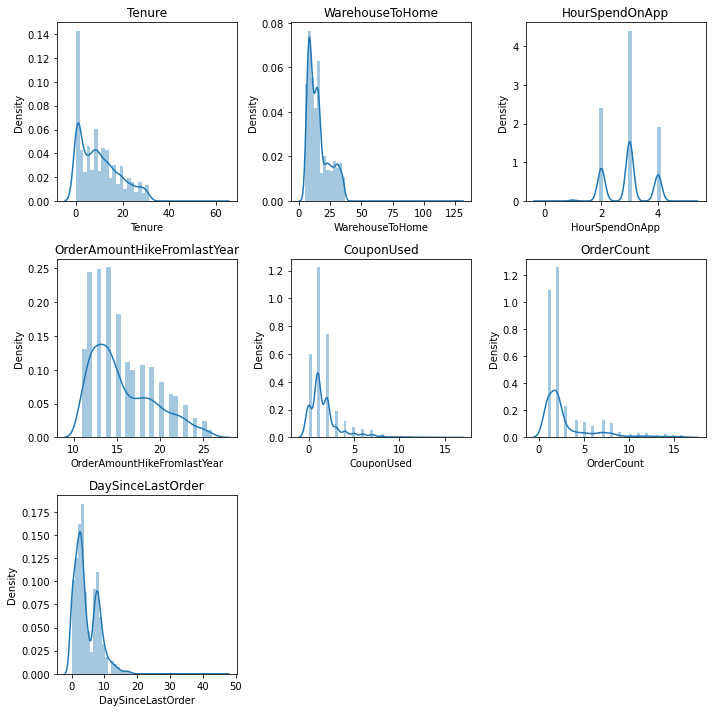

In [6]:
plt.figure(figsize=(10,10))
for i in range(len(indexing)):
  plt.subplot(3,3,i+1)
  sns.distplot(df[indexing[i]], kde=True)
  plt.title(indexing[i])
  plt.tight_layout()
plt.show()

In [7]:
df[indexing].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5366.000000,5379.000000,5375.000000,5365.000000,5374.000000,5372.000000,5323.000000
mean,10.189899,15.639896,2.931535,15.707922,1.751023,3.008004,4.543491
std,8.557241,8.531475,0.721926,3.675485,1.894621,2.939680,3.654433
min,0.000000,5.000000,0.000000,11.000000,0.000000,1.000000,0.000000
25%,2.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.000000
50%,9.000000,14.000000,3.000000,15.000000,1.000000,2.000000,3.000000
75%,16.000000,20.000000,3.000000,18.000000,2.000000,3.000000,7.000000
max,61.000000,127.000000,5.000000,26.000000,16.000000,16.000000,46.000000


Berdasarkan distribution plot dan juga describe data, filling lost value diberikan nilai 'mean' sebagai pendekatan ke distribusi normal

In [8]:
for i in indexing:
  df[i]=df[i].fillna(df[i].mean())

df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [9]:
kategorikal=df.columns[df.dtypes=='object']
for i in kategorikal:
  print('Kolom {} memiliki value counts'.format(i))
  print(df[i].value_counts())
  print('\n')

Kolom PreferredLoginDevice memiliki value counts
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


Kolom PreferredPaymentMode memiliki value counts
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Kolom Gender memiliki value counts
Male      3384
Female    2246
Name: Gender, dtype: int64


Kolom PreferedOrderCat memiliki value counts
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


Kolom MaritalStatus memiliki value counts
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




# Handle Duplicated Data

In [10]:
df.drop_duplicates(keep='last',inplace=True)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Outlier Handling

In [12]:
numerikal=df.columns[df.dtypes !='object']
df[numerikal].describe()    

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.354164,0.915389,8.339095,0.705384,1.023999,1.380194,2.583586,0.451408,3.587926,1.851038,2.871521,3.553382,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,4.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.008004,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


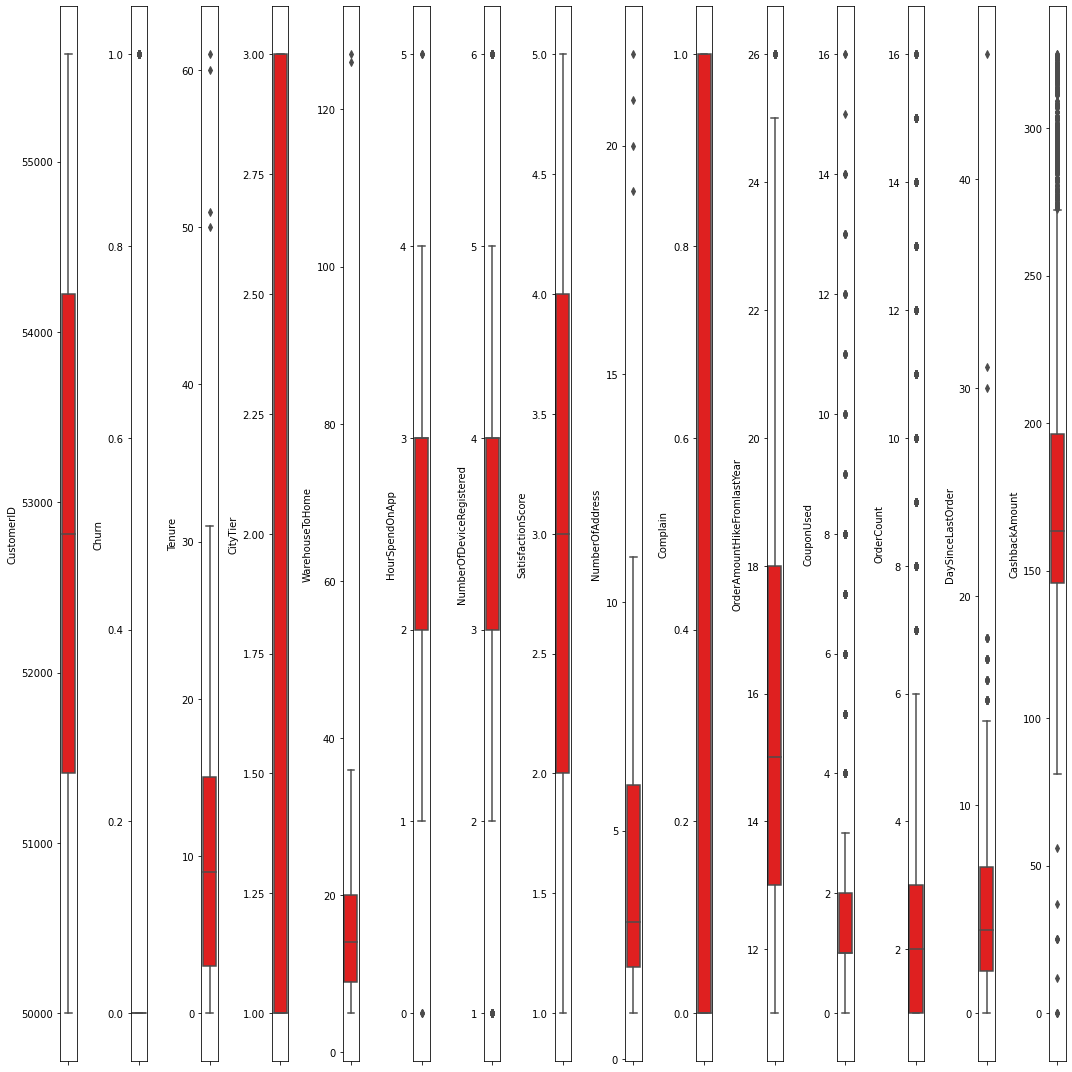

In [13]:
plt.figure(figsize=(15,15))
for i in range(len(numerikal)):
  plt.subplot(1,len(numerikal),i+1)
  sns.boxplot(y=df[numerikal[i]], color='red', orient='v')
  plt.tight_layout()
plt.show()

Dilihat dari boxplot data numerikal, banyak kolom memiliki outlier data dan nilai nya bervariasi.
Outlier handling akan dilakukan pendekatan melalui metode z_score

In [14]:
# OUTLIER PAKEK Z SCORE AJA KARENA IQR NYA VARIASI
from scipy.stats import zscore
filtering=np.array([True]*len(df))
for i in numerikal:
  scoring=zscore(df[i])
  filtering=(scoring < 5) & filtering

df_new=df[filtering]

In [15]:
print('sebelum filtering shape {}'.format(df.shape))
print('setelah filtering shape {}'.format(df_new.shape))

sebelum filtering shape (5630, 20)
setelah filtering shape (5594, 20)


# Machine Learning Model

In [16]:
df_ml=df_new.copy()
df_ml.head()
# Pemilihan feature

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [17]:
df_ml['DaySinceLastOrder']=round(df_ml['DaySinceLastOrder'], 2)
df_ml['OrderCount']=df_ml['OrderCount'].astype('int')
df_ml['Tenure']=round(df_ml['Tenure'], 2)
df_ml['HourSpendOnApp']=round(df_ml['HourSpendOnApp'], 2)

In [18]:
# Pemilihan feature
df_ml.columns
feature=['Tenure', 'PreferredLoginDevice','WarehouseToHome','HourSpendOnApp','SatisfactionScore','Complain',
         'OrderCount','DaySinceLastOrder']
label=['Churn']
df_ml=df_ml[feature+label]

In [19]:
baru=pd.get_dummies(df['PreferredLoginDevice'], prefix='Pengguna')
df_ml=df_ml.join(baru)
df_ml.drop(['PreferredLoginDevice'], axis=1, inplace=True)

In [20]:
df_ml.head()

,Tenure,WarehouseToHome,HourSpendOnApp,SatisfactionScore,Complain,OrderCount,DaySinceLastOrder,Churn,Pengguna_Computer,Pengguna_Mobile Phone,Pengguna_Phone
0,4.00,6.0,3.00,2,1,1,5.0,1,0,1,0
1,10.19,8.0,3.00,3,1,1,0.0,1,0,0,1
2,10.19,30.0,2.00,3,1,1,3.0,1,0,0,1
3,0.00,15.0,2.00,5,0,1,3.0,1,0,0,1
4,0.00,12.0,2.93,5,0,1,3.0,1,0,0,1


In [21]:
X=df_ml.drop(['Churn'], axis=1)
y=df_ml['Churn']

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix

In [23]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
# Dengan proporsi training data 80% dan testing data adalah 20%

## Neighbors Model

In [24]:
# Neihgbors
neighbors=KNeighborsClassifier(n_neighbors=5,
                               leaf_size=26)
neighbors.fit(x_train, y_train)
nei_pred=neighbors.predict(x_test)
nei_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
nei_f1=f1_score(y_test, nei_pred)
nei_acu=accuracy_score(y_test, nei_pred)
nei_prec=precision_score(y_test, nei_pred)
evaluasi_nei=[nei_f1, nei_acu, nei_prec]
evaluasi_nei

[0.6081081081081081, 0.8963360142984808, 0.7377049180327869]

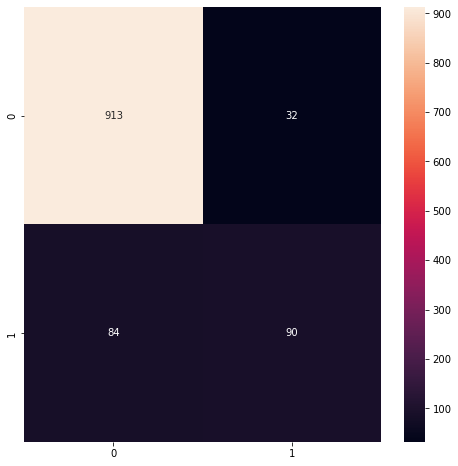

In [26]:
conf_nei=confusion_matrix(y_test, nei_pred)
plt.figure(figsize=(8,8))
sns.heatmap(conf_nei, annot=True,fmt="g")
plt.show()

In [27]:
# Hyperparameter tuning
semisal_nei=KNeighborsClassifier()
paramaeter_nei={
    'n_neighbors':list(range(1,15)),
    'leaf_size':list(range(25,36))
}

In [28]:
tuning=GridSearchCV(semisal_nei, paramaeter_nei, cv=5)
tuning.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                       35],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [29]:
tuning.best_params_

{'leaf_size': 28, 'n_neighbors': 1}

## Random Forest Model

In [30]:
# Tree
RandomForestClassifier().get_params().keys()
tree=RandomForestClassifier()
parameter_tree={'criterion':['gini', 'entropy'],
                'max_depth':[300,500]}

tuning_tree=GridSearchCV(tree, parameter_tree, cv=5, scoring='f1')
tuning_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 500]},
             scoring='f1')

In [31]:
tuning_tree.best_params_

{'criterion': 'gini', 'max_depth': 500}

In [32]:
tree=RandomForestClassifier(criterion='entropy',
                            max_depth=500)
tree.fit(x_train, y_train)
tree_pred=tree.predict(x_test)

In [33]:
tree_f1=f1_score(y_test, tree_pred)
tree_acu=accuracy_score(y_test, tree_pred)
tree_prec=precision_score(y_test, tree_pred)
evaluasi_tree=[tree_f1, tree_acu, tree_prec]
evaluasi_tree

[0.8440366972477066, 0.9544235924932976, 0.9019607843137255]

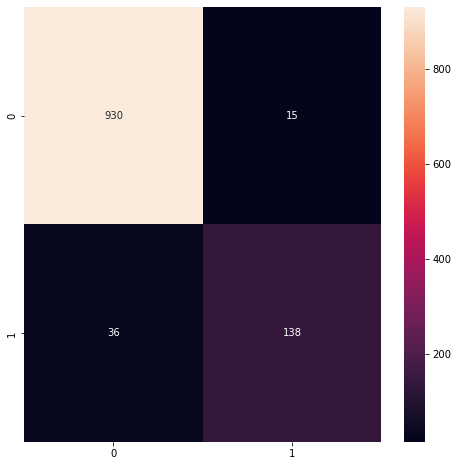

In [34]:
conf_tree=confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(8,8))
sns.heatmap(conf_tree, annot=True,fmt="g")
plt.show()

In [35]:
print('Checking overfitting tuning')
print('Untuk testing dapat {}'.format(tree.score(x_test, y_test)))
print('Untuk training dapat {}'.format(tree.score(x_train, y_train)))

Checking overfitting tuning
Untuk testing dapat 0.9544235924932976
Untuk training dapat 0.99731843575419


For notes* tidak terjadi over fitting untuk model Random Forest

## Logistic Regression

In [36]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [37]:
logistic=LogisticRegression()
logistic.fit(x_train, y_train)
log_prediction=logistic.predict(x_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
log_f1=f1_score(y_test, log_prediction)
log_acu=accuracy_score(y_test, log_prediction)
log_prec=precision_score(y_test, log_prediction)
evaluasi_log=[log_f1, log_acu, log_prec]
evaluasi_log

[0.46692607003891057, 0.8775692582663092, 0.7228915662650602]

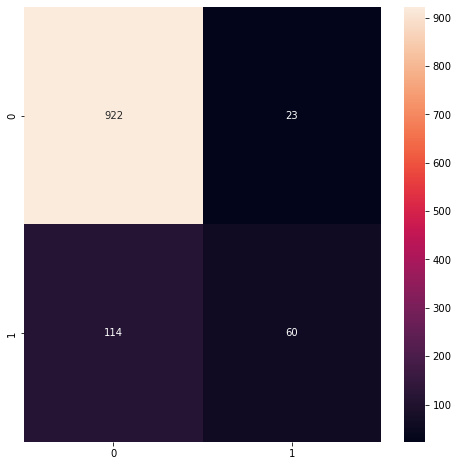

In [39]:
conf_log=confusion_matrix(y_test, log_prediction)
plt.figure(figsize=(8,8))
sns.heatmap(conf_log, annot=True,fmt="g")
plt.show()

In [40]:
eval_total=list(zip(evaluasi_nei, evaluasi_tree, evaluasi_log))
eval_total

[(0.6081081081081081, 0.8440366972477066, 0.46692607003891057),
 (0.8963360142984808, 0.9544235924932976, 0.8775692582663092),
 (0.7377049180327869, 0.9019607843137255, 0.7228915662650602)]

# Evaluation Matrix

In [41]:
pd.DataFrame(data=eval_total, columns=['Neighbors','Random Forest','Logistic'],
             index=['f1','Accuracy', 'Presisi'])

,Neighbors,Random Forest,Logistic
f1,0.608108,0.844037,0.466926
Accuracy,0.896336,0.954424,0.877569
Presisi,0.737705,0.901961,0.722892


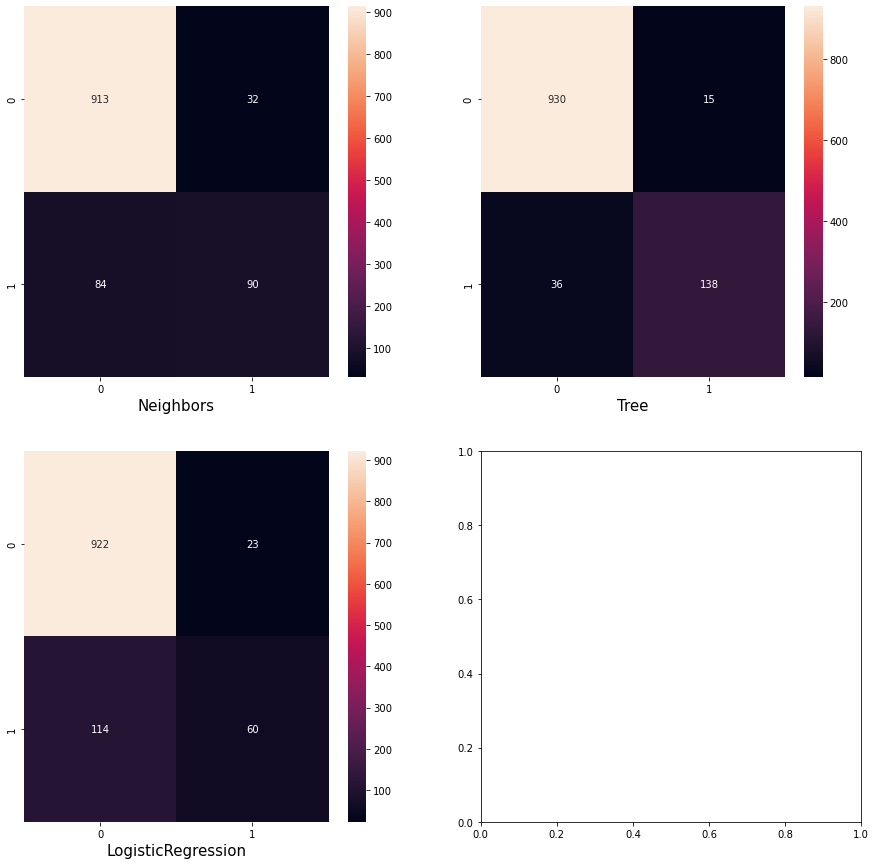

In [42]:
fig, ax=plt.subplots(2,2,figsize=(15,15))

sns.heatmap(conf_nei, annot=True, fmt="g", ax=ax[0,0])
ax[0,0].set_xlabel('Neighbors', fontsize=15)

sns.heatmap(conf_tree, annot=True, fmt="g", ax=ax[0,1])
ax[0,1].set_xlabel('Tree', fontsize=15)

sns.heatmap(conf_log, annot=True, fmt="g", ax=ax[1,0])
ax[1,0].set_xlabel('LogisticRegression', fontsize=15)
plt.show()

Last conclusion dari pengerjaan analisa churn factor of e-commerce
1. Model terbaik terdapat pada model Random Forest
2. Parameter yang 

In [43]:
print("==============CONCLUSION==============")
print('Last conclusion dari pengerjaan analisa churn factor of e-commerce')
print('1. Model terbaik terdapat pada model Random Forest')
print('\n')
print('2. Parameter penentu churn factor pada model Machine Learning adalah sebagai berikut:')
import string  
for index, value in enumerate(feature):
    print('2.{} {}'.format(string.ascii_lowercase[index], value))

print('\n')
print('3. Based on confusion matrix, nilai TP didapati pula tertinggi pada Random Forest Model')

==============CONCLUSION==============
Last conclusion dari pengerjaan analisa churn factor of e-commerce
1. Model terbaik terdapat pada model Random Forest


2. Parameter penentu churn factor pada model Machine Learning adalah sebagai berikut:
2.a Tenure
2.b PreferredLoginDevice
2.c WarehouseToHome
2.d HourSpendOnApp
2.e SatisfactionScore
2.f Complain
2.g OrderCount
2.h DaySinceLastOrder


3. Based on confusion matrix, nilai TP didapati pula tertinggi pada Random Forest Model
